## Spike Challenge Precio
### Franco Betteo

In [105]:
# Librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import utils

In [3]:
pd.set_option('display.max_columns', 100)

In [38]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


### 1. Datos
TODO: better display

In [5]:
precipitaciones = pd.read_csv("precipitaciones.csv")
precipitaciones.head()

,date,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
0,1989-02-01,0.719033,0.117045,0.028272,0.0,0.724667,9.172945,22.595834,52.268010
1,1998-10-01,0.065216,0.000000,0.011493,0.0,0.008968,2.089674,14.702087,45.142041
2,2001-02-01,2.030026,0.047987,0.002634,0.0,0.032163,10.768351,29.465057,65.571098
3,2008-11-01,0.622784,0.000000,0.015872,0.0,1.734168,25.083557,64.901645,113.093488
4,2009-04-01,0.008065,0.000000,0.009396,0.0,12.080715,56.233424,96.364235,155.622235


In [6]:
banco_central = pd.read_csv("banco_central.csv")
banco_central.head()

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
0,2013-03-01 00:00:00 UTC,102.796.218,10.546.824,978.554.365,102.297.537,114.994.919,110.729.395,100.064.328,103.163.651,103.405.852,579.846.819,570.624.122,123.491.343,110.356.254,131.350.889,130.648.285,367.818.436,162.692.807,330.305.467,643.366.109,974.948.182,103.469.519,184.460.073,807.709.837,212.409.058,301.314.934,710.242.818,115.489.064,202.838.669,546.694.889,337.915.263,5.691.837,11.393.886,793.471.519,140.103.913,512.994.015,108.482.797,896.688.023,659.936.009,118.109.613,7.638.022,1593.60,288.157,347.586.864,301.11,3.8117,109.24,76.520.246,92.91,89.171,472.484,799.068.585,798.092.771,258.428.756,901.504.814,360.108.494,18.951.548,229.653.619,547.033.124,19.153.327,155.736.824,498.854.717,341.857.582,682.423.108,151.916.628,349.444.258,445.435.266,587.837.412,362.517.856,82.567.788,201.875.908,416.124.956,190.085.519,NaN,93.621,865.903.468,102.761.705,98.915.705,NaN,108.387.837,580.480.672,NaN,NaN,NaN,28577.0
1,2013-04-01 00:00:00 UTC,101.664.842,999.272.757,927.333.293,104.485.589,102.199.311,106.098.291,102.600.107,101.937.319,102.766.884,374.895.706,606.504.665,11.702.736,10.358.806,134.393.001,133.442.735,38.211.344,188.

### 2. Análisis de datos. Creación de variables

In [7]:
precipitaciones.describe()

,Coquimbo,Valparaiso,Metropolitana_de_Santiago,Libertador_Gral__Bernardo_O_Higgins,Maule,Biobio,La_Araucania,Los_Rios
count,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000,496.000000
mean,16.154691,32.450980,49.666682,72.249805,98.662773,128.113406,151.486456,199.451789
std,32.629286,55.434330,74.361099,101.426112,122.766771,130.056094,126.628503,140.073615
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.001170,0.005331,0.748127
25%,0.821521,1.538162,5.297546,5.343992,11.897363,29.356684,52.930343,89.805643
50%,4.071036,9.037825,19.087592,25.995969,45.649888,79.558557,110.570990,159.467940
75%,16.137600,38.409213,63.408364,101.875093,142.230716,184.751307,208.316243,274.594590
max,347.133889,441.048604,524.592667,645.515752,759.177712,702.434707,661.211203,717.735673


In [8]:
precipitaciones_long = pd.melt(precipitaciones, id_vars="date", var_name="region", value_name="precipitaciones")

In [9]:
descripcion_precipitaciones = precipitaciones_long.groupby("region").agg({'date': ['min', 'max', 'count'],
                                                           'precipitaciones': ['min', 'max', 'mean', 'median', utils.count_na]
                                                            })
descripcion_precipitaciones.columns = ["_".join(pair) for pair in descripcion_precipitaciones.columns]
descripcion_precipitaciones.reset_index()                                                    

,region,date_min,date_max,date_count,precipitaciones_min,precipitaciones_max,precipitaciones_mean,precipitaciones_median,precipitaciones_count_na
0,Biobio,1979-01-01,2020-04-01,496,0.001170,702.434707,128.113406,79.558557,0
1,Coquimbo,1979-01-01,2020-04-01,496,0.000000,347.133889,16.154691,4.071036,0
2,La_Araucania,1979-01-01,2020-04-01,496,0.005331,661.211203,151.486456,110.570990,0
3,Libertador_Gral__Bernardo_O_Higgins,1979-01-01,2020-04-01,496,0.000000,645.515752,72.249805,25.995969,0
4,Los_Rios,1979-01-01,2020-04-01,496,0.748127,717.735673,199.451789,159.467940,0
5,Maule,1979-01-01,2020-04-01,496,0.000000,759.177712,98.662773,45.649888,0
6,Metropolitana_de_Santiago,1979-01-01,2020-04-01,496,0.000000,524.592667,49.666682,19.087592,0
7,Valparaiso,1979-01-01,2020-04-01,496,0.000000,441.048604,32.450980,9.037825,0


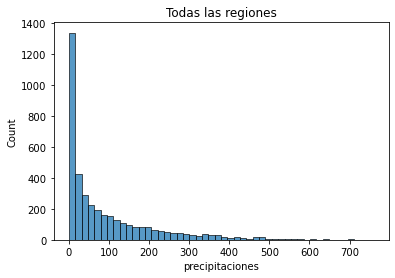

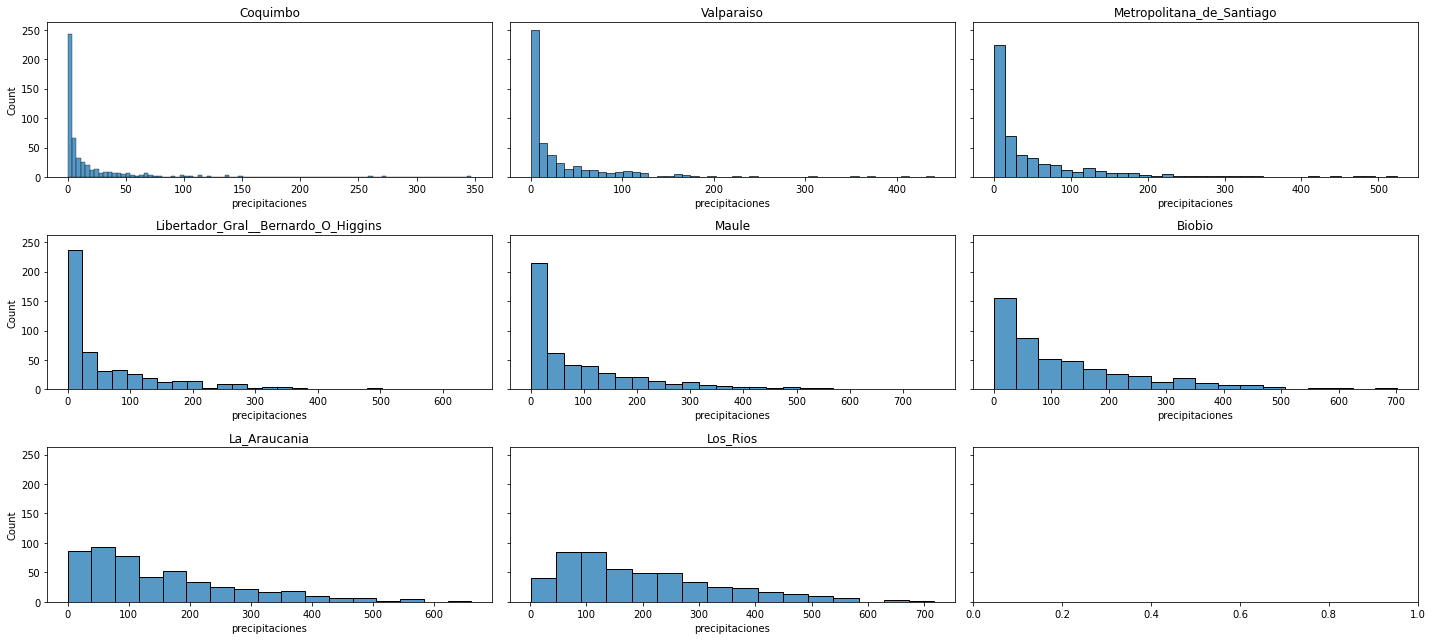

In [10]:
utils.plot_hist_precipitaciones(precipitaciones_long)
plt.title("Todas las regiones")

fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(20,9), sharey=True)
ax = ax.flatten()

for i, region in enumerate(precipitaciones_long.region.unique()):
    utils.plot_hist_precipitaciones(precipitaciones_long, region=region, ax=ax[i])
    ax[i].set_title(region)
plt.tight_layout()

In [11]:
banco_central.shape

(614, 85)

In [106]:
banco_central_clean = banco_central.copy(deep=True)

# remover separador de miles con punto (excepto Periodo)
banco_central_clean = banco_central.apply(lambda x: x.astype('str').str.replace("\.","", regex=True) if x.name in banco_central.columns[1:] else x)
# reemplazar caracteres por Nan  (excepto Periodo)
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('str').str.replace("[a-zA-Z]+","NaN", regex=True) if x.name in banco_central.columns[1:] else x)
# convierto a numerico, Nan en los vacíos
banco_central_clean = banco_central_clean.apply(lambda x: x.astype('float') if x.name in banco_central.columns[1:] else x)
# fix de mes 13 en 2020, deberia ser 12
banco_central_clean['Periodo'] = np.where(banco_central_clean['Periodo']=="2020-13-01 00:00:00 UTC", "2020-12-01 00:00:00 UTC", banco_central_clean['Periodo'])

In [108]:
banco_central_clean.apply([lambda x: x.min(skipna=True), 'max', 'mean', utils.count_na], 0)

,Periodo,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
<lambda>,1970-01-01 00:00:00 UTC,5.296994e+06,1.014872e+06,1.010200e+07,1.032193e+06,1.027326e+06,4.237199e+06,7.563720e+05,9.371354e+06,9.043380e+05,1.586778e+07,1.039671e+07,1.271215e+06,10358806.0,1.292978e+06,1.358560e+05,3.005438e+06,1.739666e+06,2.477710e+07,6.407887e+06,1.008940e+05,9.841677e+06,1.690736e+06,6.502213e+06,1.995621e+07,2.808115e+06,1.072958e+07,1.118740e+05,2.525630e+05,6.350730e+05,4.420184e+06,5.691837e+06,1.139389e+07,8.045511e+07,1.157557e+07,5.196854e+06,1.158010e+05,9.452492e+06,5.852693e+06,1.108406e+07,9.900000e+01,401.000000,15.000000,1.000000e+00,1334.000000,26.000000,186.000000,4.346090e+05,113.000000,450.000000,4.701000e+03,8.156196e+06,6.251775e+07,2.630406e+06,7.456535e+07,3.516149e+07,2.165196e+06,2.933080e+05,6.865296e+06,1.656582e+06,1.453648e+07,5.036122e+07,3.304888e+06,6.859292e+07,1.561431e+06,3.966499e+07,4.672877e+06,7.420130e+05,3.614386e+07,1.036809e+07,2.124974e+07,3.661411e+06,0.000000e+00,26169553.0,1.205000e+03,1.094737e+06,1.000880e+07,9.475840e+05,1.023349e+07,7.480450e+05,6.107000e+03,1.014057e+06,1.009480e+05,1.007317e+07,46580.000000
max,2020-12-01 00:00:00 UTC,9.998748e+08,9.992728

In [23]:
set([x[0]  for x in banco_central_clean.columns.str.split("_")])

{'Derechos',
 'Generacion',
 'Imacec',
 'Impuesto',
 'Indice',
 'No',
 'Ocupacion',
 'Ocupados',
 'PIB',
 'Periodo',
 'Precio',
 'Tipo',
 'Ventas'}

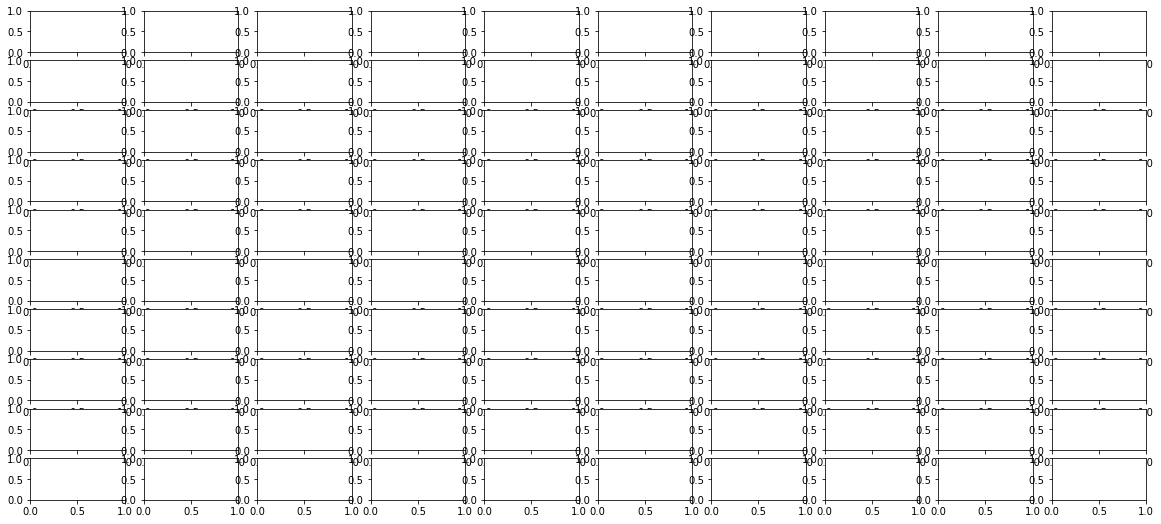

In [29]:
# Visualizar de alguna manera todas las variables?
fig, ax = plt.subplots(nrows=10, ncols=10, figsize=(20,9))
ax = ax.flatten()

# for i,col in  enumerate(banco_central_clean.columns[1:]):
#     sns.boxplot(data=banco_central_clean, x=col, orient="v", ax=ax[i])


In [30]:
banco_central_long = pd.melt(banco_central_clean, id_vars="Periodo", var_name="variable", value_name="valor")

In [89]:
banco_central_long.head()

,Periodo,variable,valor
0,2013-03-01 00:00:00 UTC,Imacec_empalmado,102796218.0
1,2013-04-01 00:00:00 UTC,Imacec_empalmado,101664842.0
2,2013-05-01 00:00:00 UTC,Imacec_empalmado,101642954.0
3,2013-06-01 00:00:00 UTC,Imacec_empalmado,998310201.0
4,2013-07-01 00:00:00 UTC,Imacec_empalmado,964696194.0


In [16]:
### SEGUIR ESTO
# Parece que segun el tipo de variable  el periodo con datos cambia.
# los numeros estan con punto separando miles
# solo 9 filas tienen todo completo


In [93]:
banco_central_clean.describe()

,Imacec_empalmado,Imacec_produccion_de_bienes,Imacec_minero,Imacec_industria,Imacec_resto_de_bienes,Imacec_comercio,Imacec_servicios,Imacec_a_costo_de_factores,Imacec_no_minero,PIB_Agropecuario_silvicola,PIB_Pesca,PIB_Mineria,PIB_Mineria_del_cobre,PIB_Otras_actividades_mineras,PIB_Industria_Manufacturera,PIB_Alimentos,PIB_Bebidas_y_tabaco,PIB_Textil,PIB_Maderas_y_muebles,PIB_Celulosa,PIB_Refinacion_de_petroleo,PIB_Quimica,PIB_Minerales_no_metalicos_y_metalica_basica,PIB_Productos_metalicos,PIB_Electricidad,PIB_Construccion,PIB_Comercio,PIB_Restaurantes_y_hoteles,PIB_Transporte,PIB_Comunicaciones,PIB_Servicios_financieros,PIB_Servicios_empresariales,PIB_Servicios_de_vivienda,PIB_Servicios_personales,PIB_Administracion_publica,PIB_a_costo_de_factores,Impuesto_al_valor_agregado,Derechos_de_Importacion,PIB,Precio_de_la_gasolina_en_EEUU_dolaresm3,Precio_de_la_onza_troy_de_oro_dolaresoz,Precio_de_la_onza_troy_de_plata_dolaresoz,Precio_del_cobre_refinado_BML_dolareslibra,Precio_del_diesel_centavos_de_dolargalon,Precio_del_gas_natural_dolaresmillon_de_unidades_termicas_britanicas,Precio_del_petroleo_Brent_dolaresbarril,Precio_del_kerosene_dolaresm3,Precio_del_petroleo_WTI_dolaresbarril,Precio_del_propano_centavos_de_dolargalon_DTN,Tipo_de_cambio_del_dolar_observado_diario,Ocupados,Ocupacion_en_Agricultura_INE,Ocupacion_en_Explotacion_de_minas_y_canteras_INE,Ocupacion_en_Industrias_manufactureras_INE,Ocupacion_en_Suministro_de_electricidad_INE,Ocupacion_en_Actividades_de_servicios_administrativos_y_de_apoyo_INE,Ocupacion_en_Actividades_profesionales_INE,Ocupacion_en_Actividades_inmobiliarias_INE,Ocupacion_en_Actividades_financieras_y_de_seguros_INE,Ocupacion_en_Informacion_y_comunicaciones_INE,Ocupacion_en_Transporte_y_almacenamiento_INE,Ocupacion_en_Actividades_de_alojamiento_y_de_servicio_de_comidas_INE,Ocupacion_en_Construccion_INE,Ocupacion_en_Comercio_INE,Ocupacion_en_Suministro_de_agua_evacuacion_de_aguas_residuales_INE,Ocupacion_en_Administracion_publica_y_defensa_INE,Ocupacion_en_Enseanza_INE,Ocupacion_en_Actividades_de_atencion_de_la_salud_humana_y_de_asistencia_social_INE,Ocupacion_en_Actividades_artisticas_INE,Ocupacion_en_Otras_actividades_de_servicios_INE,Ocupacion_en_Actividades_de_los_hogares_como_empleadores_INE,Ocupacion_en_Actividades_de_organizaciones_y_organos_extraterritoriales_INE,No_sabe__No_responde_Miles_de_personas,Tipo_de_cambio_nominal_multilateral___TCM,Indice_de_tipo_de_cambio_real___TCR_promedio_1986_100,Indice_de_produccion_industrial,Indice_de_produccion_industrial__mineria,Indice_de_produccion_industrial_electricidad__gas_y_agua,Indice_de_produccion_industrial__manufacturera,Generacion_de_energia_electrica_CDEC_GWh,Indice_de_ventas_comercio_real_IVCM,Indice_de_ventas_comercio_real_no_durables_IVCM,Indice_de_ventas_comercio_real_durables_IVCM,Ventas_autos_nuevos
count,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.000000e+02,3.010000e+02,3.000000e+02,3.000000e+02,3.000000e+02,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.600000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,9.500000e+01,5.940000e+02,613.000000,613.000000,6.130000e+02,172.000000,253.000000,253.000000,2.530000e+02,453.000000,157.000000,4.620000e+02,1.300000e+02,9.400000e+01,9.500000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,9.400000e+01,1.000000e+01,3.130000e+02,4.200000e+02,1.440000e+02,3.720000e+02,8.400000e+01,3.600000e+02,2.640000e+02,8.400000e+01,8.400000e+01,8.500000e+01,145.000000
mean,5.046252e+08,6.126781e+08,6.427296e+08,6.118681e+08,5.586226e+08,4.607443e+0

In [18]:
banco_central.dropna().shape

(9, 85)

### 3. Visualizaciones

In [19]:
precipitaciones_long.query('region=="Metropolitana_de_Santiago"')

,date,region,precipitaciones
992,1989-02-01,Metropolitana_de_Santiago,0.028272
993,1998-10-01,Metropolitana_de_Santiago,0.011493
994,2001-02-01,Metropolitana_de_Santiago,0.002634
995,2008-11-01,Metropolitana_de_Santiago,0.015872
996,2009-04-01,Metropolitana_de_Santiago,0.009396
...,...,...,...
1483,1988-10-01,Metropolitana_de_Santiago,4.621711
1484,2019-08-01,Metropolitana_de_Santiago,4.509748
1485,2015-06-01,Metropolitana_de_Santiago,4.888708
1486,2016-09-01,Metropolitana_de_Santiago,1.066980


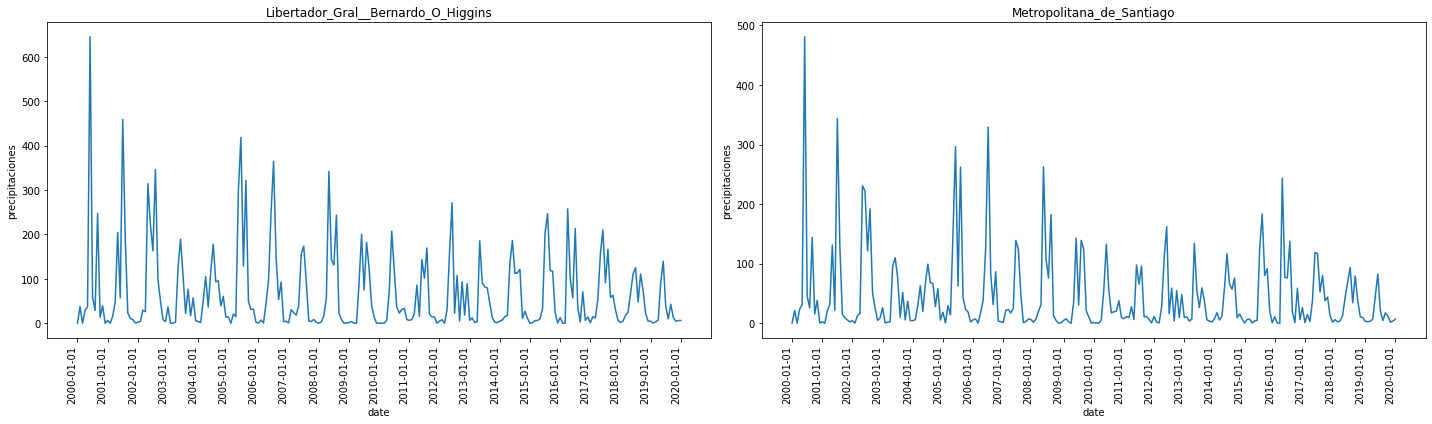

In [88]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(20,6))
ax = ax.flatten()

for i, region in enumerate(['Libertador_Gral__Bernardo_O_Higgins', 'Metropolitana_de_Santiago']):
    utils.plot_line_precipitaciones(precipitaciones_long, region=region, desde="2000-01-01", hasta="2020-01-01", ax=ax[i])
    
fig.autofmt_xdate(rotation=90)
plt.tight_layout()

In [21]:
# Completar comentarios

d:\Data Science\spike\utils.py:57: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio',


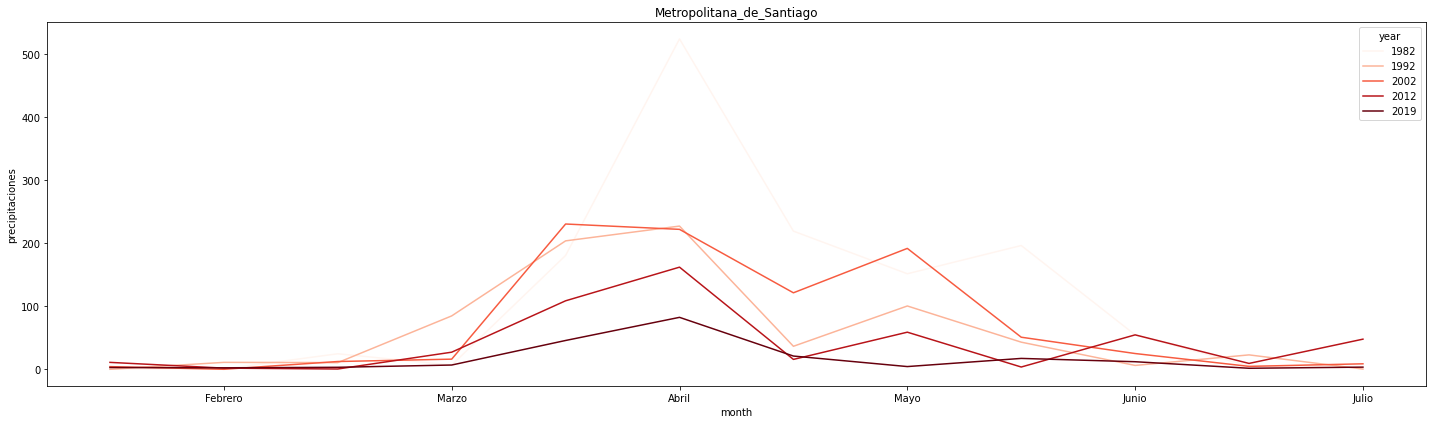

In [84]:
## CORREGIR MESES EN XTICKLABELS y COLORES
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,6))
# ax = ax.flatten()

years = [1982,1992,2002,2012,2019]
utils.plot_precipitaciones_mensuales(precipitaciones_long, region="Metropolitana_de_Santiago", years=years, ax=ax)

plt.tight_layout();

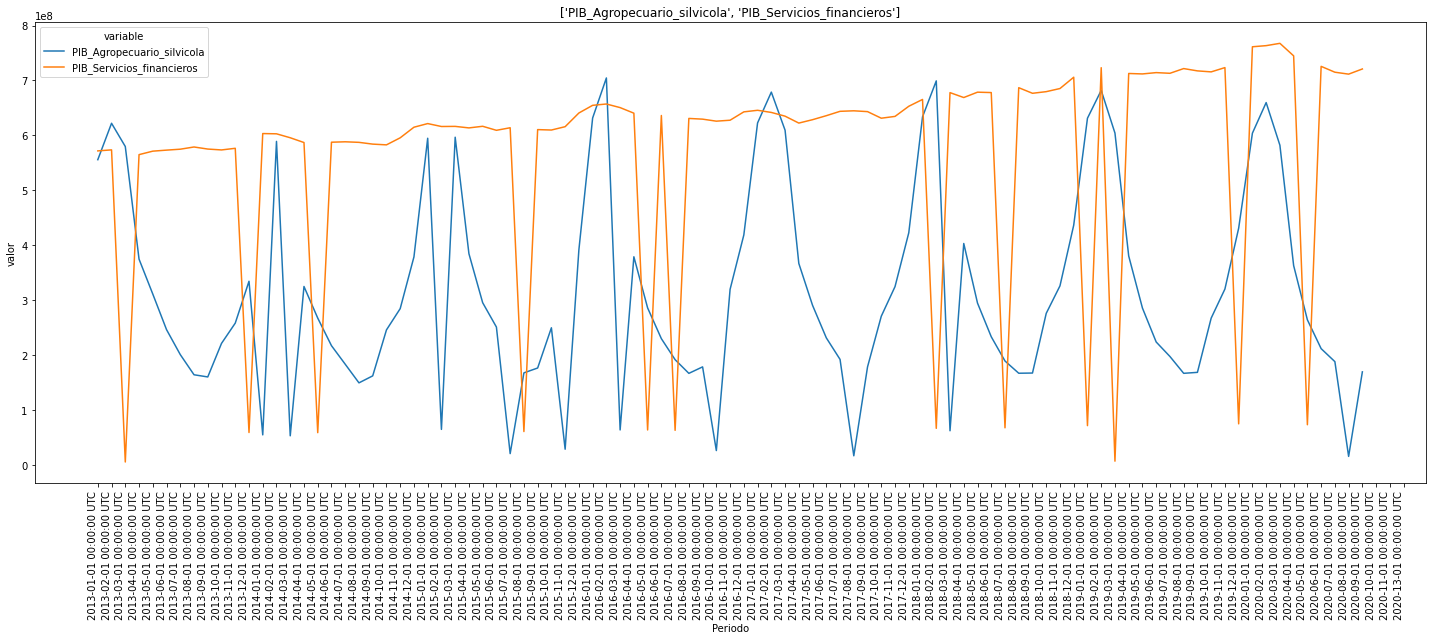

In [98]:
# validar que este bien
fig, ax = plt.subplots(1,1, figsize=(20,9))
utils.plot_pbi(banco_central_long, series=['PIB_Agropecuario_silvicola','PIB_Servicios_financieros'], desde="2013-01-01", hasta="2022-01-01", ax=ax)

fig.autofmt_xdate(rotation=90)
plt.tight_layout()

In [ ]:
# agregar comentarios

### 4. Tratamiento y creación de variables

Al ser todas variables numéricas continuas uno puede calcular los coeficientes de correlación de a pares, siempre y cuando respeten el mismo ordenamiento de fechas.
Tanto Pearson como Spearman son válidas para este escenario, la primera mide correlación lineal mientras que la segunda mira correlación de rankings y permite captar otro tipo de asociaciones.
El impacto depende del modelo seleccionado pero idealmente se busca baja correlación entre los predictores para facilitar el entrenamiento (problemas numéricos, de interpretación, etc), es decir,  no suma tener dos variables que proveen la misma información.  
Tener series con comportamientos distintos puede aportar de distintas maneras a la predicción de nuestra serie target.
Por otro lado, tener una serie que correlacione bien con nuestra serie target es siempre útil porque ya nos da mucha información acerca de lo que queremos predecir.

In [109]:
leche = pd.read_csv("precio_leche.csv")
leche.head()

,Anio,Mes,Precio_leche
0,1979,Ene,3.85
1,1979,Feb,4.58
2,1979,Mar,5.18
3,1979,Abr,6.06
4,1979,May,7.25


In [ ]:
# merge
# año, mes, trimestre (ver pdf)
# medias moviles
# acumuladas
# no olvidar el shift

### 5. Modelo
